<a href="https://colab.research.google.com/github/victorjoseij/2nd-trimester/blob/main/2348570_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
df=pd.read_csv('/content/Program_4_Dataset.csv')

In [ ]:
df.head()

,index,OS_Time_Stamp,Temperature,Pressure,Humidity,TimeStamp
0,0,1456761674,17.7,1015.2,76.4,2016-03-01 00:01:14+08:00
1,1,1456761733,17.7,1015.3,76.4,2016-03-01 00:02:13+08:00
2,2,1456761792,17.7,1015.3,76.5,2016-03-01 00:03:12+08:00
3,3,1456761853,17.7,1015.3,76.7,2016-03-01 00:04:13+08:00
4,4,1456761912,17.6,1015.2,76.8,2016-03-01 00:05:12+08:00


In [ ]:
df.info()

In [ ]:
df.shape

(2878, 6)

In [ ]:
df.isnull().sum()

index            0
OS_Time_Stamp    0
Temperature      0
Pressure         0
Humidity         0
TimeStamp        0
dtype: int64

In [ ]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,index,OS_Time_Stamp,Temperature,Pressure,Humidity
index,1.000000,0.006708,0.307819,-0.100828,-0.249279
OS_Time_Stamp,0.006708,1.000000,0.845870,-0.846012,0.849345
Temperature,0.307819,0.845870,1.000000,-0.736080,0.461280
Pressure,-0.100828,-0.846012,-0.736080,1.000000,-0.714600
Humidity,-0.249279,0.849345,0.461280,-0.714600,1.000000


<ipython-input-11-1e658c9067f8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True)


<Axes: >

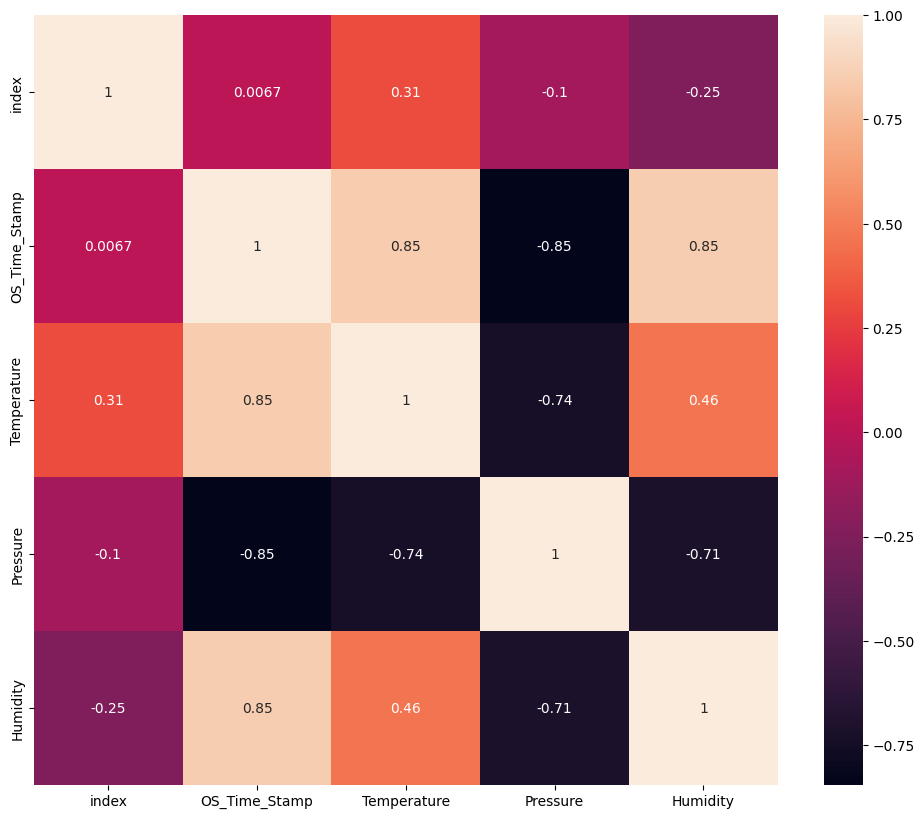

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot =True)

In [ ]:
predictor = df[['Temperature']]
target = df['Pressure']

Degree: 2, Split Ratio: 0.66, R-squared: 0.6266694111938397


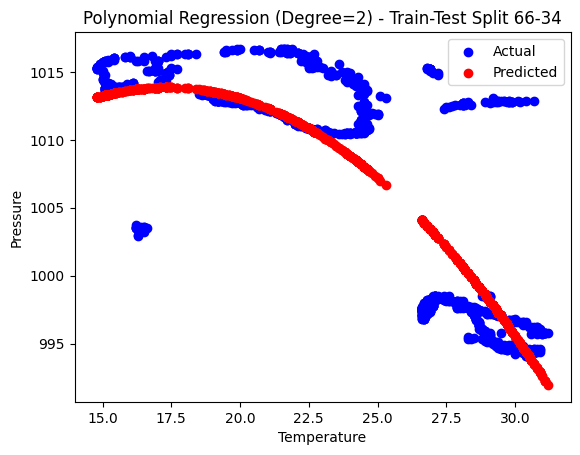

Degree: 2, Split Ratio: 0.7, R-squared: 0.64527735998073
Degree: 2, Split Ratio: 0.8, R-squared: 0.6263280190072713
Degree: 3, Split Ratio: 0.66, R-squared: 0.6429539020521366
Degree: 3, Split Ratio: 0.7, R-squared: 0.6571658253546484
Degree: 3, Split Ratio: 0.8, R-squared: 0.634678388154881
Degree: 4, Split Ratio: 0.66, R-squared: 0.6828200324619633
Degree: 4, Split Ratio: 0.7, R-squared: 0.6941666046410397
Degree: 4, Split Ratio: 0.8, R-squared: 0.6724506321807433
Degree: 5, Split Ratio: 0.66, R-squared: 0.6945536198701664
Degree: 5, Split Ratio: 0.7, R-squared: 0.7042085681914689
Degree: 5, Split Ratio: 0.8, R-squared: 0.6829249359241117
Degree: 6, Split Ratio: 0.66, R-squared: 0.7078162513455158
Degree: 6, Split Ratio: 0.7, R-squared: 0.7175240834347205
Degree: 6, Split Ratio: 0.8, R-squared: 0.6955199132228507
Degree: 7, Split Ratio: 0.66, R-squared: 0.7148201935008502
Degree: 7, Split Ratio: 0.7, R-squared: 0.7214072058044864
Degree: 7, Split Ratio: 0.8, R-squared: 0.704196143593

In [ ]:
degrees = [2, 3, 4, 5, 6, 7]
split_ratios = [0.66, 0.7, 0.8]

# for loop to iterate over the degrees and split_ratios

for degree in degrees:
    for split_ratio in split_ratios:
        X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=1 - split_ratio, random_state=42)


        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)


        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_pred = model.predict(X_test_poly)

        r_squared = r2_score(y_test, y_pred)
        print(f"Degree: {degree}, Split Ratio: {split_ratio}, R-squared: {r_squared}")
        if degree == 2 and split_ratio == 0.66:
            plt.scatter(X_test, y_test, color='blue', label='Actual')
            plt.scatter(X_test, y_pred, color='red', label='Predicted')
            plt.xlabel('Temperature')
            plt.ylabel('Pressure')
            plt.legend()
            plt.title('Polynomial Regression (Degree=2) - Train-Test Split 66-34')
            plt.show()

In [ ]:
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print("---------------------------------------------")

R-squared: 0.7041961435935306
Mean Squared Error: 20.999434130616496
Mean Absolute Error: 3.1524489677729215
---------------------------------------------
